In [1]:
import numpy as np

x = np.array([1.8, -4.5, 9.2, 7.3])
y = np.array([-5.2, -1.1, 0.7, 5.1])

In [2]:
def add(x: np.ndarray, y: np.ndarray):
    x_plus_y = np.zeros(shape=len(x))

    for i in range(len(x_plus_y)):
        x_plus_y[i] = x[i] + y[i]

    return x_plus_y

In [3]:
add(x, y)

array([-3.4, -5.6,  9.9, 12.4])

In [4]:
np.equal(x + y, add(x, y))

array([ True,  True,  True,  True])

In [5]:
1.0 == 0.3*3 + 0.1

False

In [6]:
0.3*3 + 0.1

0.9999999999999999

In [7]:
all(np.equal(x + y, add(x, y)))

True

In [8]:
def just_a_quadratic_polynomial(x):
    return 3*x**2 + 1

In [9]:
x = np.array([1.8, -4.5, 9.2, 7.3])
just_a_quadratic_polynomial(x)

array([ 10.72,  61.75, 254.92, 160.87])

In [10]:
from math import exp

exp(x)

TypeError: only length-1 arrays can be converted to Python scalars

In [13]:
def naive_exp(x: np.ndarray):
    x_exp = np.empty_like(x)

    for i in range(len(x)):
        x_exp[i] = exp(x[i])

    return x_exp

In [14]:
naive_exp(x)

array([6.04964746e+00, 1.11089965e-02, 9.89712906e+03, 1.48029993e+03])

In [16]:
def bit_less_naive_exp(x: np.ndarray):
    return np.array([exp(x_i) for  x_i in x])

In [17]:
bit_less_naive_exp(x)

array([6.04964746e+00, 1.11089965e-02, 9.89712906e+03, 1.48029993e+03])

In [18]:
all(np.equal(naive_exp(x), np.exp(x)))

True

In [19]:
all(np.equal(bit_less_naive_exp(x), np.exp(x)))

True

In [20]:
from timeit import timeit

n_runs = 100000
size = 1000

t_naive_exp = timeit(
    "np.array([exp(x_i) for x_i in x])",
    setup=f"import numpy as np; from math import exp; x = np.ones({size})",
    number = n_runs
)

t_numpy_exp = timeit(
    "np.exp(x)",
    setup=f"import numpy as np; from math import exp; x = np.ones({size})",
    number=n_runs
)

print(f"Built-in exponential:    \t{t_naive_exp:.5f} s")
print(f"NumPy exponential:       \t{t_numpy_exp:.5f} s")
print(f"Performance improvement: \t{t_naive_exp/t_numpy_exp:.5f} times faster")

Built-in exponential:    	9.14064 s
NumPy exponential:       	0.36054 s
Performance improvement: 	25.35282 times faster


In [21]:
def naive_sum(x: np.ndarray):
    val = 0

    for x_i in x:
        val += x_i

    return val

In [22]:
naive_sum(x)

np.float64(13.799999999999999)

In [23]:
sum(x)

np.float64(13.799999999999999)

In [24]:
np.sum(x)

np.float64(13.799999999999999)

In [25]:
x.sum()

np.float64(13.799999999999999)

In [26]:

t_naive_sum = timeit(
    "sum(x)",
    setup=f"import numpy as np; x = np.ones({size})",
    number=n_runs
)

t_numpy_sum = timeit(
    "np.sum(x)",
    setup=f"import numpy as np; x = np.ones({size})",
    number=n_runs
)


print(f"Built-in sum:            \t{t_naive_sum:.5f} s")
print(f"NumPy sum:               \t{t_numpy_sum:.5f} s")
print(f"Performance improvement: \t{t_naive_sum/t_numpy_sum:.5f} times faster")

Built-in sum:            	5.25367 s
NumPy sum:               	0.19594 s
Performance improvement: 	26.81235 times faster


In [27]:
np.prod(x)

np.float64(-543.996)

In [28]:
def euclidean_norm(x: np.ndarray):
    return np.sqrt(np.sum(x**2))

In [30]:
x = np.array([-3.0, 1.2, 1.2, 2.1])
y = np.array([8.1, 6.3])

In [31]:
euclidean_norm(x)

np.float64(4.036087214122113)

In [32]:
euclidean_norm(y)

np.float64(10.261578825892242)

In [33]:
np.linalg.norm(x)

np.float64(4.036087214122113)

In [34]:
np.equal(euclidean_norm(x), np.linalg.norm(x))

np.True_

In [35]:
type(np.inf)

float

In [36]:
def p_norm(x: np.ndarray, p: float):
    if np.isinf(p):
        return np.max(np.abs(x))
    elif p >= 1:
        return (np.sum(np.abs(x)**p))**(1/p)
    else:
        raise ValueError("p must be a float larger or equal than 1.0 or inf.")

In [37]:
x = np.array([-3.0, 1.2, 1.2, 2.1])

for p in [1, 2, 42, np.inf]:
    print(f"p-norm for p = {p}: \t {p_norm(x, p=p):.5f}")

p-norm for p = 1: 	 7.50000
p-norm for p = 2: 	 4.03609
p-norm for p = 42: 	 3.00000
p-norm for p = inf: 	 3.00000


In [38]:
def euclidean_distance(x: np.ndarray, y: np.ndarray):
    return np.linalg.norm(x - y, ord=2)

In [39]:
def dot_product(x: np.ndarray, y: np.ndarray):
    return np.sum(x*y)

In [40]:
x = np.array([-3.0, 1.2, 1.2, 2.1])
y = np.array([1.9, 2.5, 3.9, 1.2])

dot_product(x, y)

np.float64(4.5)

In [41]:
x = np.array([-3.0, 1.2, 1.2, 2.1])
y = np.array([1.9, 2.5])

dot_product(x, y)

ValueError: operands could not be broadcast together with shapes (4,) (2,) 

In [42]:
x = np.array([-3.0, 1.2, 1.2, 2.1])
y = np.array([2.0])

dot_product(x, y)

np.float64(3.0)

In [43]:
x*y

array([-6. ,  2.4,  2.4,  4.2])

In [44]:

x = np.array([-3.0, 1.2, 1.2, 2.1])
y = np.array([1.9, 2.5, 3.9, 1.2])

np.dot(x, y)

np.float64(4.5)

In [45]:
x = np.array([-3.0, 1.2, 1.2, 2.1])
y = np.array([2.0])

np.dot(x, y)

ValueError: shapes (4,) and (1,) not aligned: 4 (dim 0) != 1 (dim 0)

In [46]:
vectors = [np.random.rand(5) for _ in range(5)]

In [47]:
vectors

[array([0.72913121, 0.12396844, 0.94126597, 0.29718171, 0.1650396 ]),
 array([0.13293447, 0.58696312, 0.12893963, 0.91962516, 0.96279327]),
 array([0.79122408, 0.91033416, 0.200593  , 0.55573626, 0.27487908]),
 array([0.45355642, 0.45295999, 0.08504295, 0.73818061, 0.67201355]),
 array([0.72819012, 0.7362454 , 0.13549063, 0.82114007, 0.58319234])]

In [48]:
from typing import List

def projection(x: np.ndarray, to: List[np.ndarray]):
    
    p_x = np.zeros_like(x)

    for e in to:
        e_norm_square = np.dot(e, e)
        p_x += np.dot(x, e)*e/e_norm_square
    
    return p_x

In [49]:
x = np.array([1.0, 2.0])
e = np.array([2.0, 1.0])

x_to_e = projection(x, to=[e])

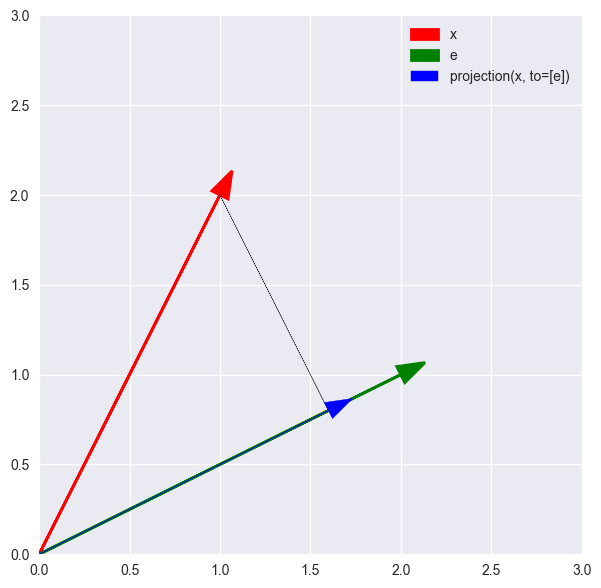

In [51]:
import matplotlib.pyplot as plt

with plt.style.context("seaborn-v0_8"):
    plt.figure(figsize=(7,7))
    plt.xlim([-0, 3])
    plt.ylim([-0, 3])
    plt.arrow(0, 0, x[0], x[1], head_width=0.1, color="r", label="x", linewidth=2)
    plt.arrow(0, 0, e[0], e[1], head_width=0.1, color="g", label="e", linewidth=2)
    plt.arrow(x_to_e[0], x_to_e[1], x[0] - x_to_e[0], x[1] - x_to_e[1], linestyle="--")
    plt.arrow(0, 0, x_to_e[0], x_to_e[1], head_width=0.1, color="b", label="projection(x, to=[e])")
    plt.legend()
    plt.show()

In [52]:
np.allclose(np.dot(e, x - x_to_e), 0.0)

True

In [59]:
def gram_schmidt(vectors: List[np.ndarray]):

    output = []
    output.append(vectors[0])
    for v in vectors[1:]:
        v_proj = projection(v, to=output)
        output.append(v - v_proj)

    output = [v/np.linalg.norm(v, ord=2) for v in output]

    return output

In [60]:
gram_schmidt([np.array([2.0, 1.0, 1.0]), 
              np.array([1.0, 2.0, 1.0]),
              np.array([1.0, 1.0, 2.0])])

[array([0.81649658, 0.40824829, 0.40824829]),
 array([-0.49236596,  0.86164044,  0.12309149]),
 array([-0.30151134, -0.30151134,  0.90453403])]

In [61]:

test_vectors = [np.array([1.0, 0.0, 0.0]), 
                np.array([1.0, 1.0, 0.0]),
                np.array([1.0, 1.0, 1.0])]

In [62]:

gram_schmidt(test_vectors)

[array([1., 0., 0.]), array([0., 1., 0.]), array([0., 0., 1.])]

In [1]:
from typing import Tuple

class Matrix:
    def __init__(self, shape: Tuple[int, int]):
        if len(shape) != 2:
            raise ValueError("The shape of a Matrix object must be a two-dimensional tuple.")
        
        self.shape = shape
        self.data = [0.0 for _ in range(shape[0]*shape[1])]

    def _linear_idx(self, i: int, j: int):
        return i*self.shape[1] + j
    
    def __getitem__(self, key: Tuple[int, int]):
        linear_idx = self._linear_idx(*key)
        return self.data[linear_idx]
    
    def __setitem__(self, key: Tuple[int, int], value):
        linear_idx = self._linear_idx(*key)
        self.data[linear_idx] = value

    def __repr__(self):
        array_form = [
            [self[i, j] for j in range(self.shape[1])]
            for i in range(self.shape[0])
        ]
        return "\n".join(["\t".join([f"{x}" for x in row]) for row in array_form])

In [2]:
M = Matrix(shape=(3,4))

In [3]:
M[1, 2] = 3.14

In [4]:
M[1, 2]

3.14

In [5]:
M

0.0	0.0	0.0	0.0
0.0	0.0	3.14	0.0
0.0	0.0	0.0	0.0

In [6]:
import numpy as np

A = np.array([[0, 1, 2, 3],
              [4, 5, 6, 7],
              [8, 9, 10, 11]

])

B =np.array([[5, 5, 5, 5], 
             [5, 5, 5, 5],
             [5, 5, 5, 5]

])

In [7]:
A

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [8]:
A + B

array([[ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

In [9]:
A * B

array([[ 0,  5, 10, 15],
       [20, 25, 30, 35],
       [40, 45, 50, 55]])

In [10]:
np.exp(A)

array([[1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01],
       [5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03],
       [2.98095799e+03, 8.10308393e+03, 2.20264658e+04, 5.98741417e+04]])

In [11]:
np.transpose(A)

array([[ 0,  4,  8],
       [ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11]])

In [12]:
A.T

array([[ 0,  4,  8],
       [ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11]])

In [13]:
A[1, 2]

np.int64(6)

In [14]:
A[:, 2]

array([ 2,  6, 10])

In [15]:
A[1, :]

array([4, 5, 6, 7])

In [16]:
A[2, 1:4]

array([ 9, 10, 11])

In [17]:
A[1]

array([4, 5, 6, 7])

In [18]:
for row in A:
    print(row)

[0 1 2 3]
[4 5 6 7]
[ 8  9 10 11]


In [19]:
np.zeros(shape=(4,5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [20]:
A = np.array([[0, 1, 2, 3],
              [4, 5, 6, 7],
              [8, 9, 10, 11]])

In [21]:
A

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [22]:
A.shape

(3, 4)

In [23]:
A.reshape(6,2)

array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11]])

In [24]:
A

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [25]:
A.reshape(-1, 2)

array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11]])

In [26]:
A.reshape(-1, 4)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [30]:
from itertools import product

def matrix_multiplication(A: np.ndarray, B: np.ndarray):
    if A.shape[1] != B.shape[0]:
        raise ValueError("The number of columns in A must match the number of rows in B.")
    
    AB = np.zeros(shape=(A.shape[0], B.shape[1]))

    for i, j in product(range(A.shape[0]), range(B.shape[1])):
        AB[i, j] = np.sum(A[i, :]*B[:, j])

    return AB

In [31]:
A = np.ones(shape=(4, 6))
B = np.ones(shape=(6, 3))

In [32]:
matrix_multiplication(A, B)

array([[6., 6., 6.],
       [6., 6., 6.],
       [6., 6., 6.],
       [6., 6., 6.]])

In [33]:
np.matmul(A, B)

array([[6., 6., 6.],
       [6., 6., 6.],
       [6., 6., 6.],
       [6., 6., 6.]])

In [34]:
for _ in range(100):
    n, m, l = np.random.randint(1, 100), np.random.randint(1, 100), np.random.randint(1, 100)
    A = np.random.rand(n, m)
    B = np.random.rand(m, l)

    if not np.allclose(np.matmul(A, B), matrix_multiplication(A, B)):
        print(f"Result mismatch for \n{A}\n and\n{B}")
        break
else:
    print("All good! Yay!")


All good! Yay!


In [35]:
A = np.ones(shape=(4, 6))
B = np.ones(shape=(6, 3))

np.allclose(A @ B, np.matmul(A, B))

True

In [36]:
x1 = np.array([2, 0, 0, 0])
x2 = np.array([-1, 1, 0, 0])

A = np.array([[0, 1, 2, 3], 
              [4, 5, 6, 7], 
              [8, 9, 10, 11]])

In [37]:
A.shape

(3, 4)

In [38]:
x1.shape

(4,)

In [39]:
np.matmul(A, x1)

array([ 0,  8, 16])

In [40]:
np.hstack([x1, x2])

array([ 2,  0,  0,  0, -1,  1,  0,  0])

In [41]:
data = np.hstack([x1.reshape(-1, 1), x2.reshape(-1, 1)])

In [42]:
data

array([[ 2, -1],
       [ 0,  1],
       [ 0,  0],
       [ 0,  0]])

In [43]:
np.matmul(A, data)

array([[ 0,  1],
       [ 8,  1],
       [16,  1]])

In [44]:
def p_norm(x: np.ndarray, p: float):
    if p >= 1:
        return (np.sum(np.abs(x)**p))**(1/p)
    elif np.isinf(p):
        return np.max(np.abs(x))
    else:
        raise ValueError("p must be a float larger or equal than 1.0 or inf.")